In [35]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import json
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

# open input file: 
ifile = open('C:\\Users\\Alexandros Ntzoufas\\Desktop\\MSC in BA\\3) Spring\\Big data contect analytics\\Projects Guide\\xaa.json', encoding='utf8') 

# read the first 100k entries
# set to -1 to process everything
stop = 100000
all_data = list()
for i, line in enumerate(ifile):
    if i%10000==0:
        print(i)
    if i==stop:
        break    
    # convert the json on this line to a dict
    data = json.loads(line)
    # extract what we want
    review_id=data['review_id']
    user_id=data['user_id']
    text = data['text']
    stars = data['stars']
    # add to the data collected so far
    all_data.append([review_id, user_id, stars, text])
# create the DataFrame
df = pd.DataFrame(all_data, columns=['review_id','user_id','stars','text'])
print(df)

ifile.close()


df['sentiment']=""
df.loc[df['stars']==1, ['sentiment']]='negative' 
df.loc[df['stars']==2, ['sentiment']]='negative'
df.loc[df['stars']==3, ['sentiment']]='neutral'
df.loc[df['stars']==4, ['sentiment']]='posotive'
df.loc[df['stars']==5, ['sentiment']]='posotive'

df= df.drop(['review_id', 'user_id', 'stars'], axis=1)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
                    review_id                 user_id  stars  \
0      Q1sbwvVQXV2734tPgoKj4Q  hG7b0MtEbXx5QzbzE6C_VA    1.0   
1      GJXCdrto3ASJOqKeVWPi6Q  yXQM5uF2jS6es16SJzNHfg    5.0   
2      2TzJjDVDEuAW6MR5Vuc1ug  n6-Gk65cPZL6Uz8qRm3NYw    5.0   
3      yi0R0Ugj_xUx_Nek0-_Qig  dacAIZ6fTM6mqwW5uxkskg    5.0   
4      11a8sVPMUFtaC7_ABRkmtw  ssoyf2_x0EQMed6fgHeMyQ    1.0   
5      fdiNeiN_hoCxCMy2wTRW9g  w31MKYsNFMrjhWxxAb5wIw    4.0   
6      G7XHMxG0bx9oBJNECG4IFg  jlu4CztcSxrKx56ba1a5AQ    3.0   
7      8e9HxxLjjqc9ez5ezzN7iQ  d6xvYpyzcfbF_AZ8vMB7QA    1.0   
8      qrffudO73zsslZbe8B9D3Q  sG_h0dIzTKWa3Q6fmb4u-g    2.0   
9      RS_GTIT6836bCaPy637kNQ  nMeCE5-xsdleyxYuNZ_7rA    3.0   
10     kbtscdyz6lvrtGjD1quQTg  FIk4lQQu1eTe2EpzQ4xhBA    4.0   
11     -I5umRTkhw15RqpKMl_o1Q  -mA3-1mN4JIEkqOtdbNXCQ    1.0   
12     Z7wgXp98wYB57QdRY3HQ3w  GYNnVehQeXjty0xH7-6Fhw    4.0   
13     qlXw1JQ0UodW7qrmVgwCXw  bAhqAPoWaZ

In [36]:
from nltk.corpus import stopwords

df = df.reset_index(drop=True)
replace_by_space = re.compile('[/(){}\[\]\|@,;]')
exclude_bad_symbols = re.compile('[^0-9a-z #+_]')
stopwords = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = replace_by_space.sub(' ', text) # replace by spac 
    text = exclude_bad_symbols.sub('', text) # remove symbols  
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in stopwords) # remove stopwors 
    return text
df['text'] = df['text'].apply(clean_text)
df['text'] = df['text'].str.replace('\d+', '')


Found 9797 unique tokens.


In [37]:

train_size = int(len(df) * .7)
train_posts = df['text'][:train_size]
train_tags = df['sentiment'][:train_size]

test_posts = df['text'][train_size:]
test_tags = df['sentiment'][train_size:]


In [33]:
df.head()

,text,sentiment
0,total bill horrible service gs crooks actually...,negative
1,adore travis hard rocks new kelly cardenas sal...,posotive
2,say office really together organized friendly ...,posotive
3,went lunch steak sandwich delicious caesar sal...,posotive
4,today second three sessions paid although firs...,negative


In [54]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

train_size = int(len(df) * .7)
train_posts = df['text'][:train_size]
train_tags = df['sentiment'][:train_size]

test_posts = df['text'][train_size:]
test_tags = df['sentiment'][train_size:]

max_words = 10000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)
tokenize.fit_on_texts(train_posts) # only fit on train

x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)

encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

batch_size = 32


# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
              
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               5120512   
_________________________________________________________________
activation_13 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 1539      
_________________________________________________________________
activation_14 (Activation)   (None, 3)                 0         
Total params: 5,122,051
Trainable params: 5,122,051
Non-trainable params: 0
_________________________________________________________________


In [55]:

from keras.callbacks import ModelCheckpoint, EarlyStopping
epochs = 15
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss',patience=5, min_delta=0.0001)])



Train on 63000 samples, validate on 7000 samples
Epoch 1/15
63000/63000 [==============================] - 118s 2ms/step - loss: 0.4284 - acc: 0.8380 - val_loss: 0.3821 - val_acc: 0.8539
Epoch 2/15
63000/63000 [==============================] - 114s 2ms/step - loss: 0.3022 - acc: 0.8867 - val_loss: 0.4091 - val_acc: 0.8437
Epoch 3/15
63000/63000 [==============================] - 115s 2ms/step - loss: 0.1922 - acc: 0.9328 - val_loss: 0.4570 - val_acc: 0.8453
Epoch 4/15
63000/63000 [==============================] - 112s 2ms/step - loss: 0.1029 - acc: 0.9675 - val_loss: 0.5397 - val_acc: 0.8397
Epoch 5/15
63000/63000 [==============================] - 112s 2ms/step - loss: 0.0549 - acc: 0.9839 - val_loss: 0.6545 - val_acc: 0.8429
Epoch 6/15
63000/63000 [==============================] - 112s 2ms/step - loss: 0.0342 - acc: 0.9904 - val_loss: 0.7339 - val_acc: 0.8401


In [56]:
loss, accuracy = model.evaluate(x_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


Training Accuracy: 0.9834
Testing Accuracy:  0.8400


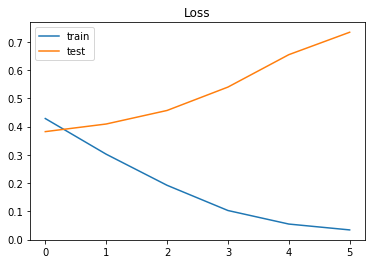

In [57]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

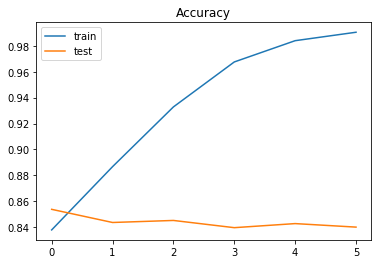

In [58]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

In [61]:
from sklearn.metrics import confusion_matrix, classification_report
Y_test_pred = model.predict_classes(x_test)
conf_mat = confusion_matrix(y_test.argmax(axis=1),
                            Y_test_pred)

pd.DataFrame(conf_mat)

,0,1,2
0,5594,518,724
1,871,822,1620
2,520,546,18785


In [62]:
print(classification_report(y_test.argmax(axis=1),
                            Y_test_pred,
                            digits=4))

              precision    recall  f1-score   support

           0     0.8009    0.8183    0.8095      6836
           1     0.4358    0.2481    0.3162      3313
           2     0.8891    0.9463    0.9168     19851

   micro avg     0.8400    0.8400    0.8400     30000
   macro avg     0.7086    0.6709    0.6808     30000
weighted avg     0.8189    0.8400    0.8260     30000

